# Model Fitness

### Project goal : Develop a customer interaction strategy based on analytical data in order to reduce customer churn.

#### We will look at how many churns we have, the mean values and find a relation between customer churn and other features.  Also we look at every feature distribution  among churns to find best strategy. We will also use different models in order to find which one has better results for our project.

In [1]:
!pip install seaborn==0.11.1 -U
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 2.5 MB/s eta 0:00:01


In [2]:
path = '/datasets'
gym_churn = pd.read_csv(path + '/gym_churn_us.csv' )

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


The mean values shoes that customers live closer to the gym, promo friends are not so used, the average contract period is 5 month but the standard deviation shows big differences so there is variety. Also the average age is 29 and customers visit the gym 2 times a week.


In [6]:
groupedbychurn = gym_churn.groupby('Churn')
groupedbychurn.mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Looks like there are longer contracts for males.
Also there is one month lifetime for females and longer, almost 5 months, for males.<br>
Seems like males enjoy going to gym more than females.

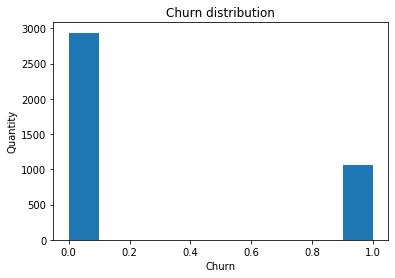

In [7]:
plt.hist(gym_churn['Churn']);
plt.title('Churn distribution');
plt.xlabel('Churn');
plt.ylabel('Quantity');

So there are 1000 out of 4000 customers leaving te gym in a month. This doesn't look so good.

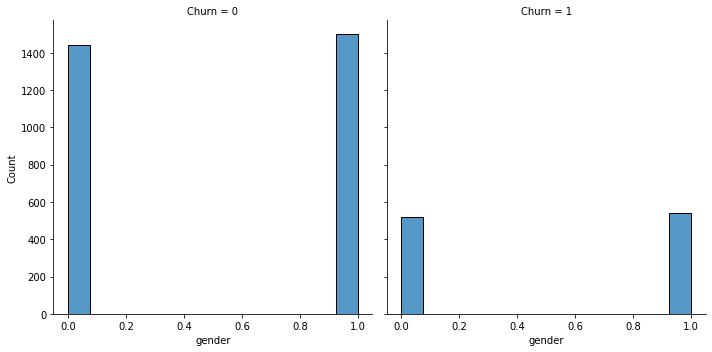

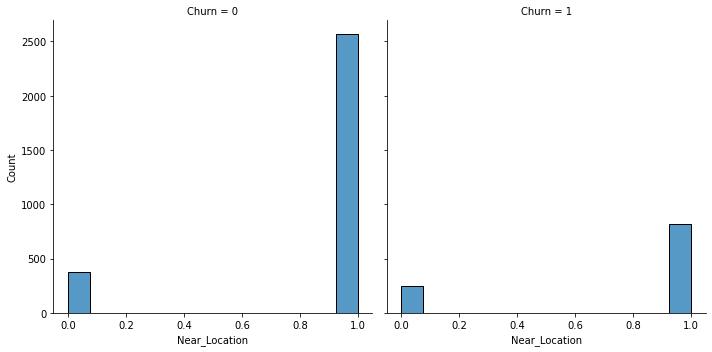

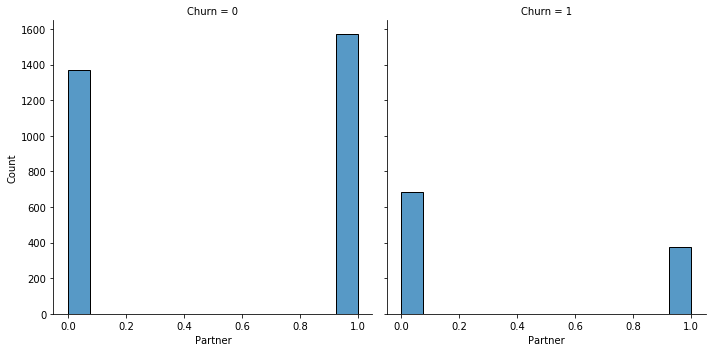

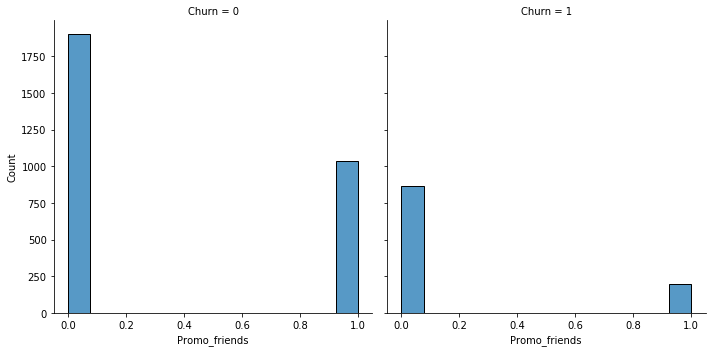

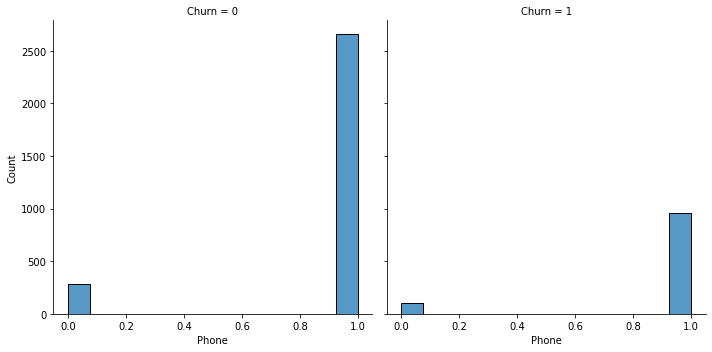

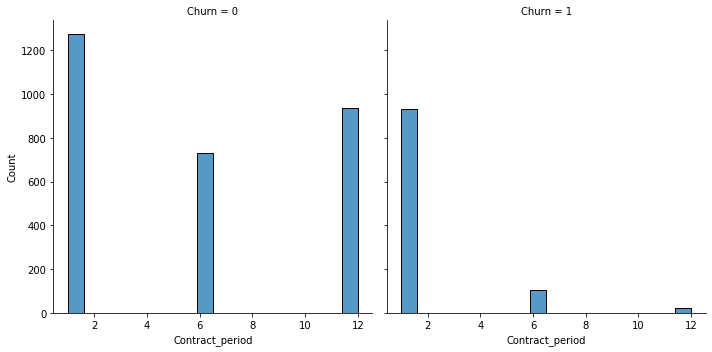

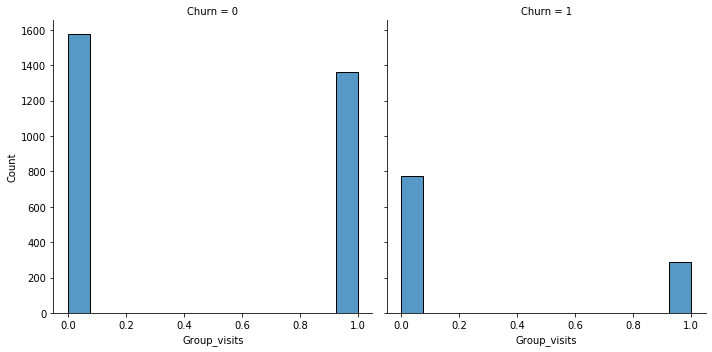

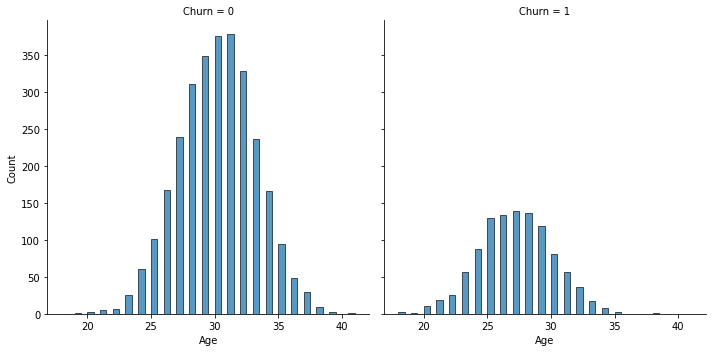

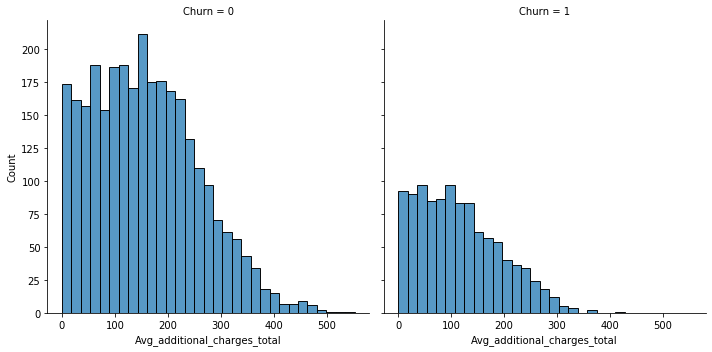

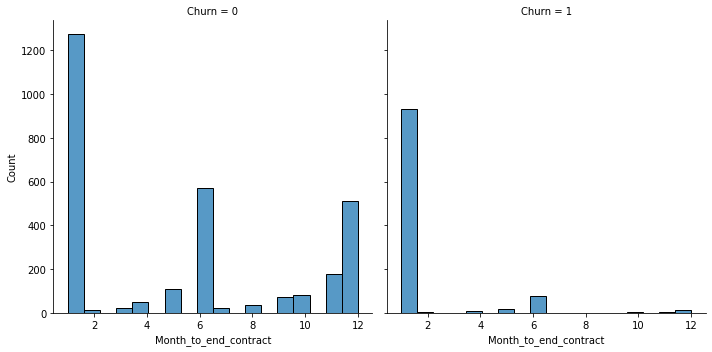

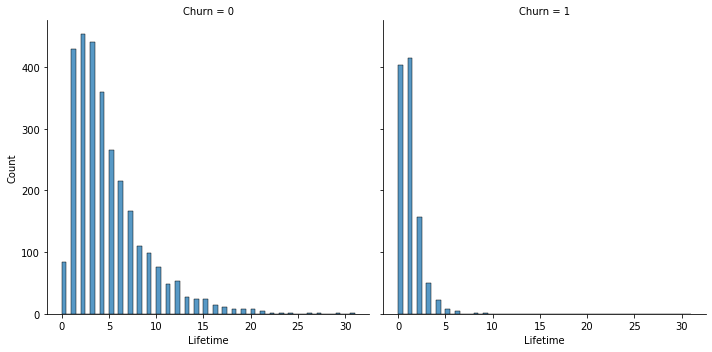

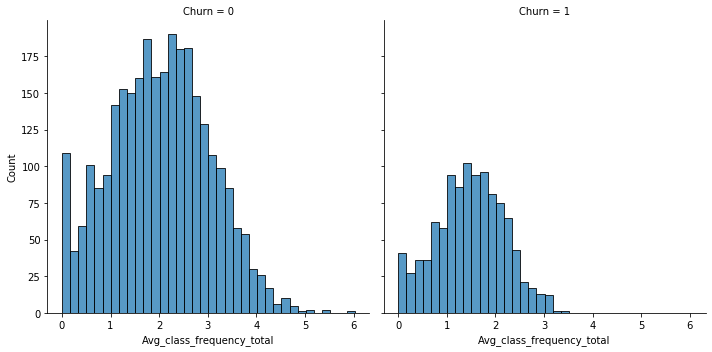

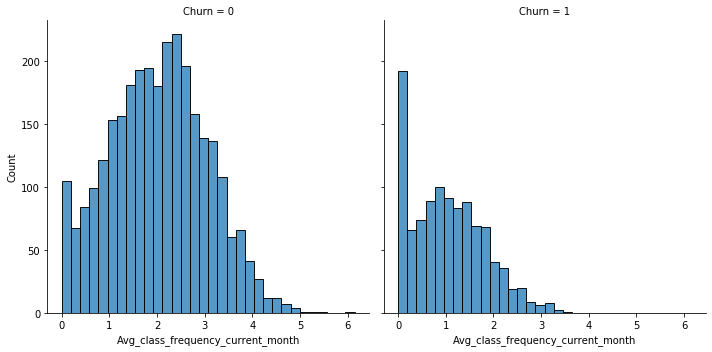

In [8]:
for col in gym_churn.drop('Churn', axis = 1).columns:
    sns.displot(col=gym_churn['Churn'],x=gym_churn[col])
    plt.show()

Customers without promotions from friends tend to abandon the gym more than those with promotions also customers with a contract period and a month to end contract less than 2 months quit and most of then are not frequenting the gym almost at all in the first month. Also even if the peak for the lifetime customers is between 2 and 7 years , in the first 3 years there is a huge probability for customers ending the contract. So maybe that's the period when customers don't have motivation as they used to have at the beginning and they quit. 

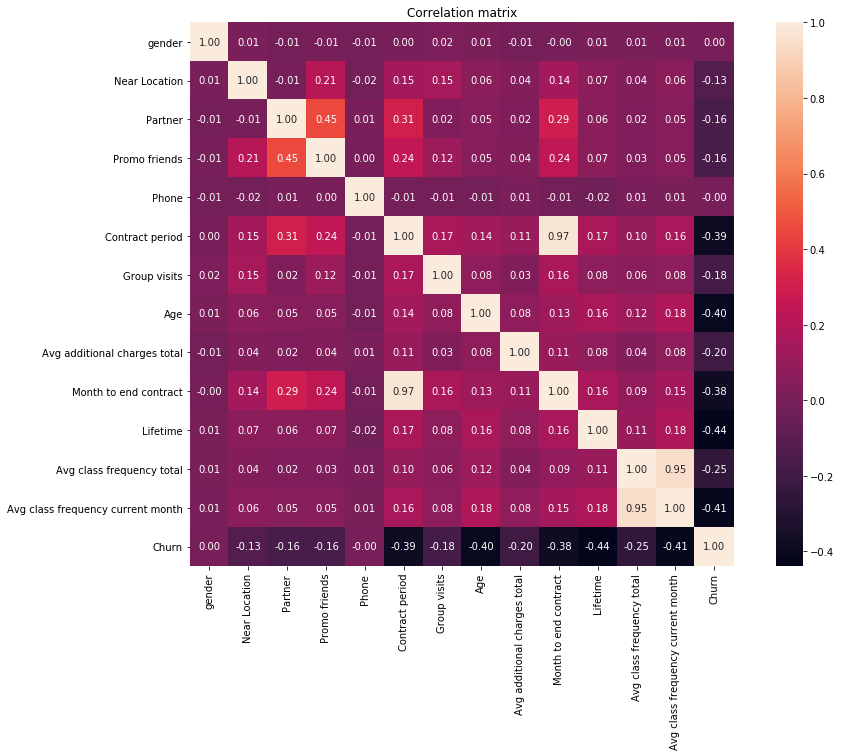

In [9]:
gym_churn1= gym_churn.rename(columns=lambda x: x.replace("_"," "))
cm = gym_churn1.corr() 
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True,square=True, fmt='.2f')
ax.set_ylim(14, 0)
fig.set_figheight(10);
fig.set_figwidth(15);
plt.title('Correlation matrix')
plt.show()


There is a strongly correletion between the features : the month to end contract and the contract period and between the frequency of the class in the first month and in total.<br>
Knowing the relationship between features, the independence ,the lack of multicolinearity and the relationship between features being linear, we can further choose the models that require these characteristics.

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [11]:
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0)

rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Both models have similar results which tells us that our predictions are right with more that 90% accurancy, also the precision of correct answers in the target class is high . The balance between the metric is also good, F1 having in both models values higher than 80%. The roc_auc value shows us that the model predict stability very well in both models.

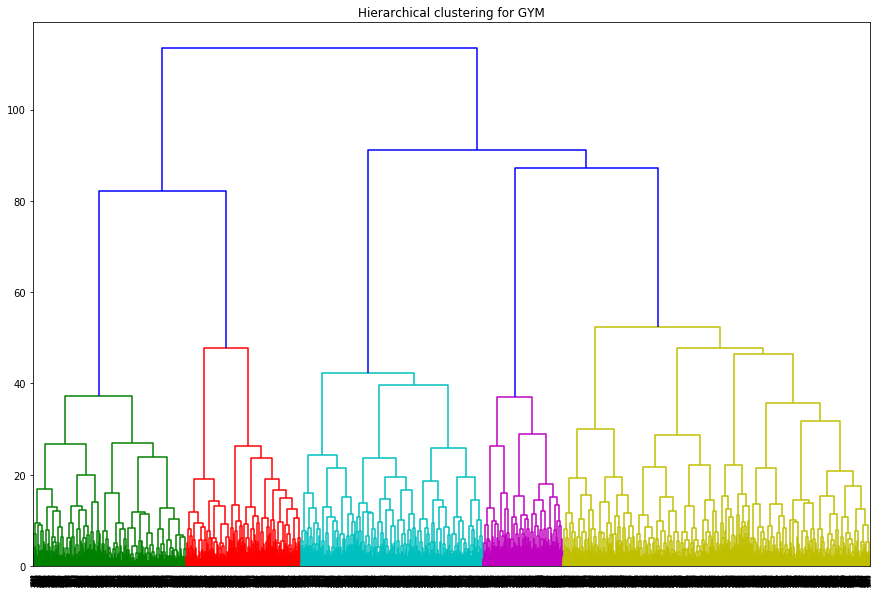

In [13]:
sc = StandardScaler()
X_sc = sc.fit_transform(gym_churn)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

As we see in the previous figure, there are 5 clusters so we will set the number of clusters as 5 for further analysis.

In [14]:
km = KMeans(n_clusters = 5,random_state = 0) 
labels = km.fit_predict(X_sc) 

   cluster_km    gender  Near_Location   Partner  Promo_friends     Phone  \
0           0  0.503676       0.000000  0.459559       0.075368  0.917279   
1           1  0.492829       0.936115  0.764016       0.534550  0.919166   
2           2  0.507917       1.000000  0.323995       0.213155  0.903776   
3           3  0.521186       0.996610  0.282203       0.208475  0.904237   
4           4  0.518895       0.968023  0.744186       0.526163  0.873547   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         2.069853      0.211397  28.522059                    132.741216   
1        10.447197      0.516297  29.962190                    161.853561   
2         1.546894      0.287454  26.926918                    113.173051   
3         1.882203      0.452542  30.237288                    157.988625   
4         8.859012      0.534884  29.728198                    162.907495   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0        

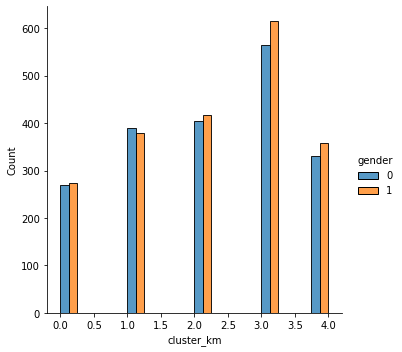

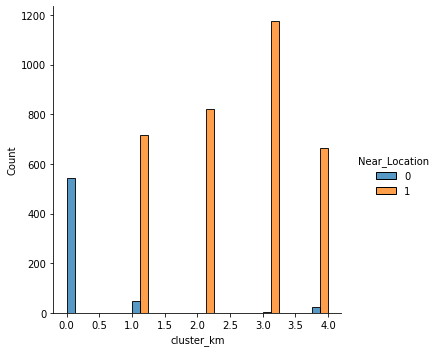

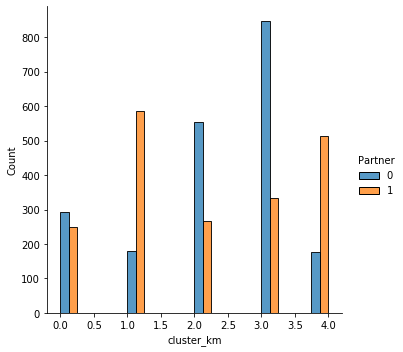

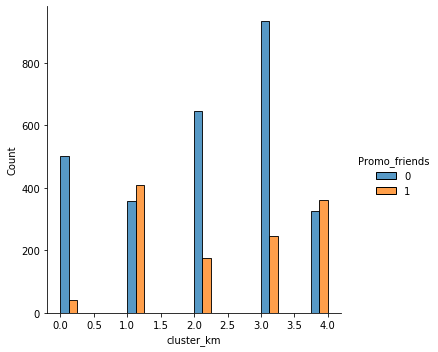

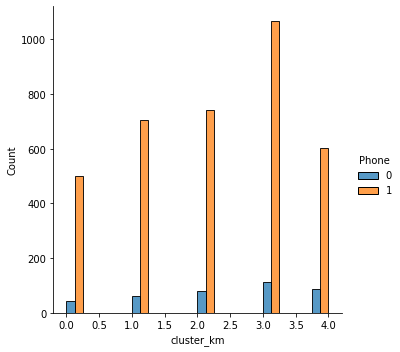

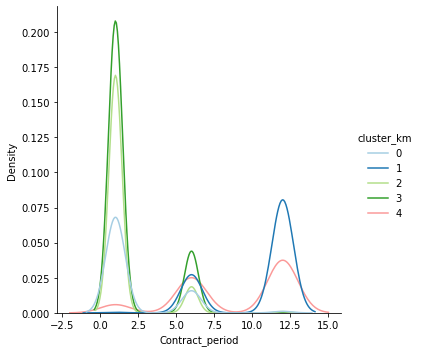

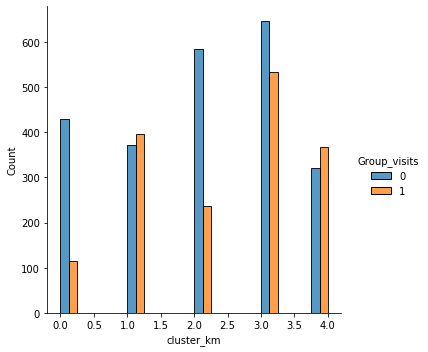

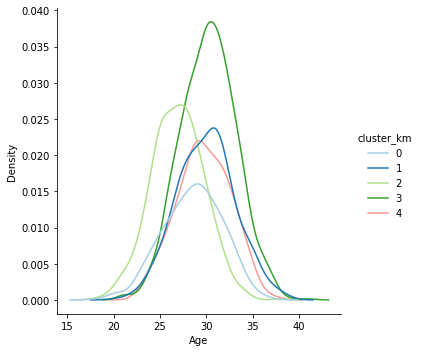

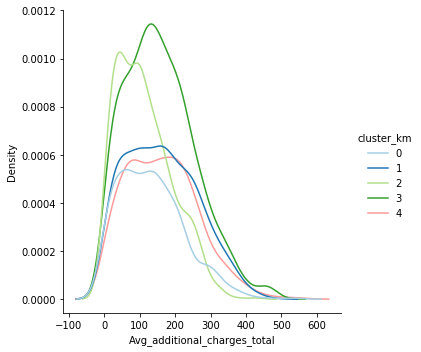

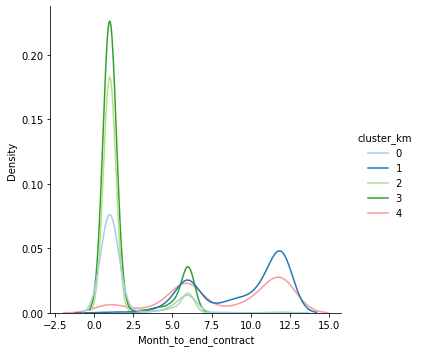

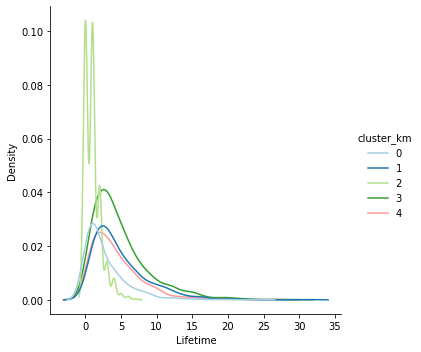

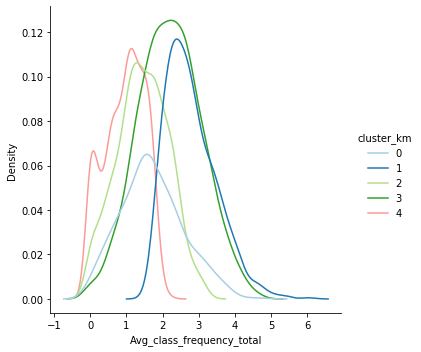

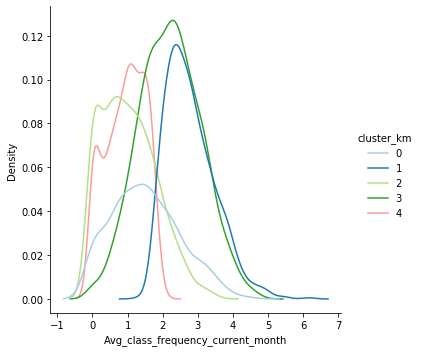

In [15]:

gym_churn['cluster_km'] = labels
gym_group_mean = gym_churn.groupby(['cluster_km']).mean().reset_index()
print(gym_group_mean)
sns.displot(gym_churn,x='cluster_km',hue = 'gender',multiple="dodge");
sns.displot(gym_churn,x='cluster_km',hue = 'Near_Location',multiple="dodge");
sns.displot(gym_churn,x='cluster_km',hue = 'Partner',multiple="dodge");
sns.displot(gym_churn,x='cluster_km',hue = 'Promo_friends',multiple="dodge");
sns.displot(gym_churn,x='cluster_km',hue = 'Phone',multiple="dodge");
sns.displot(gym_churn,x='Contract_period',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='cluster_km',hue = 'Group_visits',multiple="dodge");
sns.displot(gym_churn,x='Age',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='Avg_additional_charges_total',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='Month_to_end_contract',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='Lifetime',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='Avg_class_frequency_total',hue = 'cluster_km', kind='kde',palette = 'Paired');
sns.displot(gym_churn,x='Avg_class_frequency_current_month',hue = 'cluster_km', kind='kde',palette = 'Paired');


The mean values and the graphs for the 5 clusters are showing that most of the churns are in the second cluster. We can notice that there are less total charges for this cluster and the average age is almost 27, the rest of them having the average age 29 or 30. The contract period has also the lowest values, only 1.5 months.

In [16]:
rate = gym_churn.groupby('cluster_km')['Churn'].sum()/ gym_churn.groupby('cluster_km')['Churn'].count()
n=0
for i in rate:
    print(n,' cluster have','{:.2%}'.format(i))
    n=n+1

0  cluster have 45.04%
1  cluster have 0.78%
2  cluster have 96.10%
3  cluster have 0.34%
4  cluster have 2.47%


Here we can also see that the cluster with the most churns is the cluster number 2 followed by the cluster number 0.

Looking at the different approches, seems like clustering method gives more precision since there is a cluster with a precision of 99.7 % and the other clusters having significantly less values.
The models used as supervised learning (logistic regression and  random clasification) are also showing good predictions , with values higher than 80% and the fact that the models show stability with a percentage of 97%  is also a very good result. 
So, as a conclusion , we can't say precisely which model is best and maybe there is a need of more in deph analysis before choosing the model that fits best.

As recomandations, we can say that the contract period for customer churn is usually only 1.5 months and maybe they are losing interest so it should be a way to keep customers interest for long term. Also the average age for customer churn is 27 and since the customers without promotions are more prone to quit , it should be a way to give more promotions since customers with promotions are more likely to stay.